In [1]:
import os
import pathlib

import matplotlib.pyplot as plt
import tensorflow as tf
import IPython.display as ipd

In [3]:


data_dir = pathlib.Path('./data/mini_speech_commands')
if not data_dir.exists():
   tf.keras.utils.get_file(
       'mini_speech_commands.zip',
       origin="http://storage.googleapis.com/download.tensorflow.org/data/mini_speech_commands.zip",
       extract=True,
       cache_dir='.', cache_subdir='data')

182082353/182082353 ━━━━━━━━━━━━━━━━━━━━ 210s 1us/step


In [4]:
# Change directory to downloaded data
os.chdir('./data')
default_dir = os.getcwd()
print(f'Data directory will be: {default_dir}')

Data directory will be: C:\Users\ADMIN\data


In [7]:
def load_audio(file_path):
    audio_binary = tf.io.read_file(file_path)
    audio, sample_rate = tf.audio.decode_wav(audio_binary)
    waveform = tf.squeeze(audio, axis=-1)
    return waveform, sample_rate

def load_audio_files(path: str, label:str):

    dataset = []
    walker = sorted(str(p) for p in Path(path).glob(f'*.wav'))

    for i, file_path in enumerate(walker):
        path, filename = os.path.split(file_path)
        speaker, _ = os.path.splitext(filename)
        speaker_id, utterance_number = speaker.split("_nohash_")
        utterance_number = int(utterance_number)
    
        # Load audio
        waveform, sample_rate = load_audio(file_path)
        dataset.append([waveform, sample_rate, label, speaker_id, utterance_number])
        
    return dataset

In [9]:
labels = [name for name in os.listdir('.') if os.path.isdir(name)]
# back to default directory
os.chdir(default_dir)
print(f'Total Labels: {len(labels)}')
print(f'Label Names: {labels}')

Total Labels: 8
Label Names: ['down', 'go', 'left', 'no', 'right', 'stop', 'up', 'yes']


In [11]:
filenames = tf.io.gfile.glob(str(default_dir) + '/*/*')
num_samples = len(filenames)
print('Number of total examples:', num_samples)

Number of total examples: 8000


In [13]:
file_path = "./yes/00f0204f_nohash_0.wav"

def load_audio(file_path):
    audio_binary = tf.io.read_file(file_path)
    audio, sample_rate = tf.audio.decode_wav(audio_binary)
    waveform = tf.squeeze(audio, axis=-1)
    return waveform, sample_rate.numpy()

waveform, sample_rate = load_audio(file_path)
print('Waveform Tensor:', waveform)
print('Sample Rate:', sample_rate)

Waveform Tensor: tf.Tensor([0.00042725 0.0007019  0.00057983 ... 0.00057983 0.00067139 0.00073242], shape=(16000,), dtype=float32)
Sample Rate: 16000


In [15]:
def plot_audio(filename):
    waveform, sample_rate = load_audio(filename)

    plt.figure()
    plt.plot(waveform.numpy())

    return waveform, sample_rate

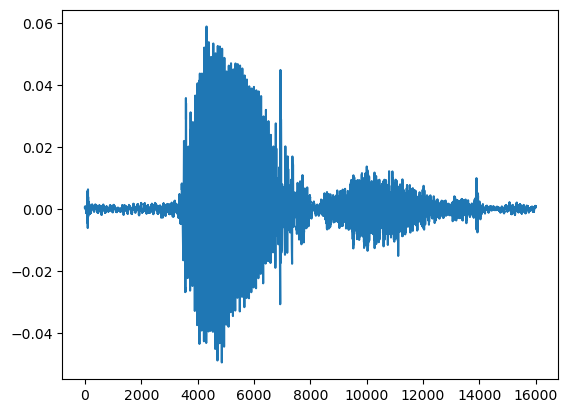

In [17]:
filename = "./yes/00f0204f_nohash_0.wav"
waveform, sample_rate = plot_audio(filename)
ipd.Audio(waveform.numpy(), rate=sample_rate)

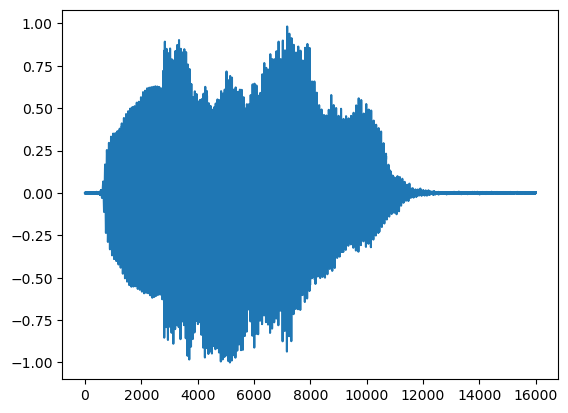

In [19]:
filename = "./no/0c2ca723_nohash_0.wav"
waveform, sample_rate = plot_audio(filename)
ipd.Audio(waveform.numpy(), rate=sample_rate)

In [21]:
%pip install tensorflow_io

Note: you may need to restart the kernel to use updated packages.


In [23]:
import os
import matplotlib.pyplot as plt
from pathlib import Path
import tensorflow as tf
import tensorflow_io as tfio
import IPython.display as ipd
import numpy as np

In [27]:
def load_audio(file_path):
    audio_binary = tf.io.read_file(file_path)
    audio, sample_rate = tf.audio.decode_wav(audio_binary)
    waveform = tf.squeeze(audio, axis=-1)
    return waveform, sample_rate

def load_audio_files(path: str, label:str):

    dataset = []
    walker = sorted(str(p) for p in Path(path).glob(f'*.wav'))

    for i, file_path in enumerate(walker):
        path, filename = os.path.split(file_path)
        speaker, _ = os.path.splitext(filename)
        speaker_id, utterance_number = speaker.split("_nohash_")
        utterance_number = int(utterance_number)
    
        # Load audio
        waveform, sample_rate = load_audio(file_path)
        dataset.append([waveform, sample_rate, label, speaker_id, utterance_number])
        
    return dataset

In [31]:
trainset_speechcommands_yes = load_audio_files('C:/Users/ADMIN/data/yes', 'yes')
trainset_speechcommands_no = load_audio_files('C:/Users/ADMIN/data/no', 'no')

print(f'Length of yes dataset: {len(trainset_speechcommands_yes)}')
print(f'Length of no dataset: {len(trainset_speechcommands_no)}')

Length of yes dataset: 1000
Length of no dataset: 1000


In [33]:
yes_waveform = trainset_speechcommands_yes[0][0]
yes_sample_rate = trainset_speechcommands_yes[0][1]
print(f'Yes Waveform: {yes_waveform}')
print(f'Yes Sample Rate: {yes_sample_rate}')
print(f'Yes Label: {trainset_speechcommands_yes[0][2]}')
print(f'Yes ID: {trainset_speechcommands_yes[0][3]}')

no_waveform = trainset_speechcommands_no[0][0]
no_sample_rate = trainset_speechcommands_no[0][1]
print(f'No Waveform: {no_waveform}')
print(f'No Sample Rate: {no_sample_rate}')
print(f'No Label: {trainset_speechcommands_no[0][2]}')
print(f'No ID: {trainset_speechcommands_no[0][3]}')

Yes Waveform: [-0.0027771  -0.00537109 -0.00338745 ... -0.00112915 -0.00131226
 -0.00140381]
Yes Sample Rate: 16000
Yes Label: yes
Yes ID: 004ae714
No Waveform: [0.00720215 0.00610352 0.00552368 ... 0.00979614 0.0085144  0.00921631]
No Sample Rate: 16000
No Label: no
No ID: 012c8314


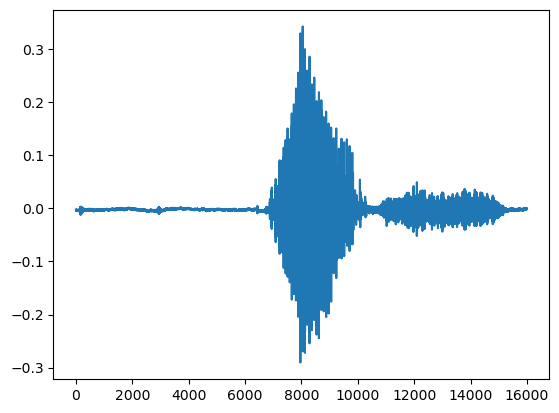

In [35]:
timescale = np.arange(yes_waveform.shape[0])
plt.figsize=(12, 8)
plt.plot(timescale, yes_waveform.numpy())
plt.show()

In [37]:
 def get_spectrogram(waveform):
    
    frame_length = 255
    frame_step = 128
    # Padding for files with less than 16000 samples
    zero_padding = tf.zeros([16000] - tf.shape(waveform), dtype=tf.float32)

    # Concatenate audio with padding so that all audio clips will be of the same length
    waveform = tf.cast(waveform, tf.float32)
    equal_length_waveform = tf.concat([waveform, zero_padding], 0)
    
    # Option 1: Use tfio to get the spectrogram
    spect = tfio.audio.spectrogram(input=equal_length_waveform, nfft=frame_length, window=frame_length, stride=frame_step)
    
    # Option 2: Use tf.signal processing to get the Short-time Fourier transform (stft)
    spectrogram = tf.signal.stft(equal_length_waveform, frame_length=frame_length, frame_step=frame_step)
    spectrogram = tf.abs(spectrogram)

    return spectrogram, spect

## This funciton has some code from https://www.tensorflow.org/tutorials/audio/simple_audio

In [39]:
spectrogram, spect = get_spectrogram(yes_waveform)

print('Label:', 'yes')
print('Waveform shape:', yes_waveform.shape)
print('Spectrogram shape:', spectrogram.shape)
print('Spect shape:', spect.shape)
print('Audio playback')
ipd.Audio(yes_waveform.numpy(), rate=16000)

Label: yes
Waveform shape: (16000,)
Spectrogram shape: (124, 129)
Spect shape: (125, 128)
Audio playback


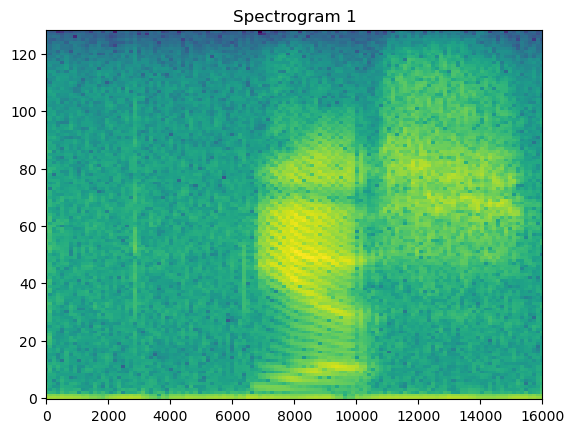

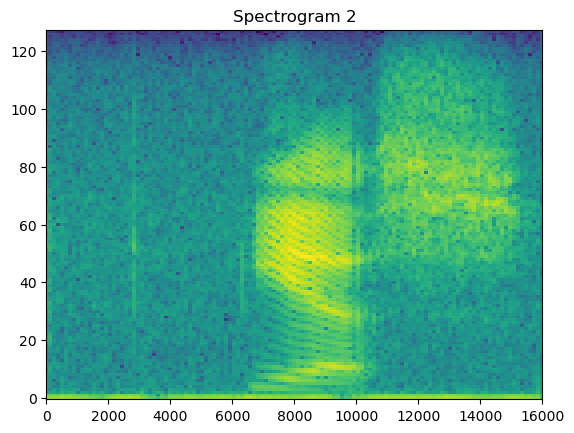

In [41]:
def plot_spectrogram(spectrogram, ax, title):
    # Convert to frequencies to log scale and transpose so that the time is
    # represented in the x-axis (columns).
    log_spec = np.log(spectrogram.T)
    height = log_spec.shape[0]
    width = log_spec.shape[1]
    X = np.linspace(0, np.size(spectrogram), num=width, dtype=int)
    Y = range(height)
    ax.pcolormesh(X, Y, log_spec)
    ax.set_xlim([0, 16000])
    ax.set_title(title)
    
fig, ax = plt.subplots()  
plot_spectrogram(spectrogram.numpy(), ax, 'Spectrogram 1')
plt.show()

fig, ax = plt.subplots()  
plot_spectrogram(spect.numpy(), ax, 'Spectrogram 2')
plt.show()


In [43]:
def create_images(dataset, label_dir):
    # make directory
    test_directory = f'C:/Users/ADMIN/data/test/{label_dir}/'
    train_directory = f'C:/Users/ADMIN/data/train/{label_dir}/'

    os.makedirs(test_directory, mode=0o777, exist_ok=True)
    os.makedirs(train_directory, mode=0o777, exist_ok=True)
    
    for i, data in enumerate(dataset):

        waveform = data[0]
        spectrogram, spect = get_spectrogram(waveform)

        # Split test and train images by 30%
        if i % 3 == 0:
            plt.imsave(f'C:/Users/ADMIN/data/test/{label_dir}/spec_img{i}.png', spectrogram.numpy(), cmap='gray')
        else:
            plt.imsave(f'C:/Users/ADMIN/data/train/{label_dir}/spec_img{i}.png', spectrogram.numpy(), cmap='gray')

        


In [45]:
create_images(trainset_speechcommands_yes, 'yes')
create_images(trainset_speechcommands_no, 'no')

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
import tensorflow_io as tfio
import IPython.display as ipd

In [49]:
train_directory = 'C:/Users/ADMIN/data/train/'
test_directory = 'C:/Users/ADMIN/data/test/'

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_directory, labels='inferred', label_mode='int', image_size=(256, 256), seed=123, 
    validation_split=0.2, subset='validation')

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_directory, labels='inferred', label_mode='int', image_size=(256, 256), 
    validation_split=None, subset=None)

class_names = train_ds.class_names
print(class_names)

Found 1332 files belonging to 2 classes.
Using 266 files for validation.
Found 668 files belonging to 2 classes.
['no', 'yes']


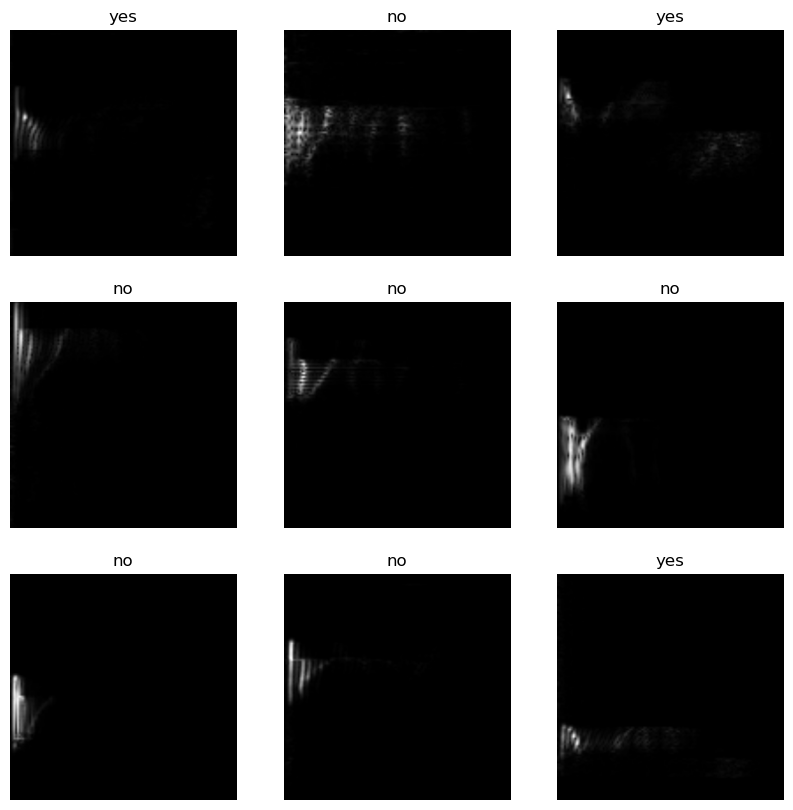

In [51]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [81]:
num_classes = 2
img_height = 256
img_width = 256

model = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(img_height, img_width, 3)),  # Input explicite
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [83]:
learning_rate = 0.125

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.SGD(learning_rate)
metrics = ['accuracy']
model.compile(optimizer, loss_fn, metrics)

In [89]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


In [91]:
history = model.fit(train_ds, validation_data=val_ds, epochs=15)


Epoch 1/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 15s 411ms/step - accuracy: 0.7451 - loss: 0.4705 - val_accuracy: 0.9023 - val_loss: 0.2668
Epoch 2/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 14s 409ms/step - accuracy: 0.9045 - loss: 0.2788 - val_accuracy: 0.9135 - val_loss: 0.2503
Epoch 3/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 14s 399ms/step - accuracy: 0.9512 - loss: 0.1439 - val_accuracy: 0.8872 - val_loss: 0.2923
Epoch 4/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 14s 407ms/step - accuracy: 0.9433 - loss: 0.1431 - val_accuracy: 0.8985 - val_loss: 0.3023
Epoch 5/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 14s 395ms/step - accuracy: 0.9777 - loss: 0.0766 - val_accuracy: 0.9549 - val_loss: 0.1939
Epoch 6/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 14s 396ms/step - accuracy: 0.9842 - loss: 0.0475 - val_accuracy: 0.9511 - val_loss: 0.1713
Epoch 7/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 14s 394ms/step - accuracy: 0.9901 - loss: 0.0393 - val_accuracy: 0.9549 - val_loss: 0.1894
Epoch 8/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 14s 409ms/step - accuracy: 0.9970 - loss: 0.0117 - val_accu

In [93]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     8,388,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,237,736 (96.27 MB)

 Trainable params: 8,412,578 (32.09 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,825,158 (64.18 MB)

In [95]:
correct = 0
batch_size = 0
for batch_num, (X, Y) in enumerate(test_ds):
    batch_size = len(Y)
    pred = model.predict(X)
    for i in range(batch_size):
        predicted = np.argmax(pred[i], axis=-1)
        actual = Y[i]
        #print(f'predicted {predicted}, actual {actual}')
        if predicted == actual:
            correct += 1
    break

print(f'Number correct: {correct} out of {batch_size}')
print(f'Accuracy {correct / batch_size}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
Number correct: 31 out of 32
Accuracy 0.96875


In [ ]:
##Advanced Optional Step: Test your voice
def load_audio(file_path):
    sample_rate = 16000
    channels = 1
    audio_binary = tf.io.read_file(file_path)
    audio, original_sample_rate = tf.audio.decode_wav(audio_binary) # desired_samples=sample_rate,desired_channels=channels 
    audio = tfio.audio.resample(audio, original_sample_rate.numpy(), sample_rate)
    waveform = tf.squeeze(audio, axis=-1)
    return waveform, sample_rate

In [ ]:
no_waveform, no_sample_rate = load_audio('./data/myvoice/no.wav')
yes_waveform, yes_sample_rate = load_audio('./data/myvoice/yes.wav')

print(no_waveform.shape)
print(yes_waveform.shape)

In [ ]:
ipd.Audio(no_waveform.numpy(), rate=16000)

In [ ]:
ipd.Audio(yes_waveform.numpy(), rate=16000)

In [ ]:
def get_spectrogram(waveform):
    # Padding for files with less than 16000 samples
    zero_padding = tf.zeros([16000] - tf.shape(waveform), dtype=tf.float32)

    # Concatenate audio with padding so that all audio clips will be of the same length
    waveform = tf.cast(waveform, tf.float32)
    equal_length = tf.concat([waveform, zero_padding], 0)
    print(len(equal_length))
    
    # Create spectrogram with tfio
    spect = tfio.audio.spectrogram(input=equal_length, nfft=255, window=255, stride=128)
    
    # Or create with tf.signal
    spectrogram = tf.signal.stft(equal_length, frame_length=255, frame_step=128)
    spectrogram = tf.abs(spectrogram)

    return spectrogram, spect

In [ ]:
no_spectrogram, no_spect = get_spectrogram(no_waveform)
yes_spectrogram, yes_spect = get_spectrogram(yes_waveform)

In [ ]:
def plot_spectrogram(spectrogram, ax, title):
    # Convert to frequencies to log scale and transpose so that the time is
    # represented in the x-axis (columns).
    log_spec = np.log(spectrogram.T)
    height = log_spec.shape[0]
    width = log_spec.shape[1]
    X = np.linspace(0, np.size(spectrogram), num=width, dtype=int)
    Y = range(height)
    ax.pcolormesh(X, Y, log_spec)
    ax.set_xlim([0, 16000])
    ax.set_title(title)
    
fig, ax = plt.subplots()  
plot_spectrogram(no_spectrogram.numpy(), ax, 'No Spectrogram')
plt.show()

fig, ax = plt.subplots()  
plot_spectrogram(yes_spectrogram.numpy(), ax, 'Yes Spectrogram')
plt.show()

In [ ]:
no_path = './data/myvoice/no_myspec_img.png'
yes_path = './data/myvoice/yes_myspec_img.png'

plt.imsave(no_path, no_spectrogram.numpy(), cmap='gray')
plt.imsave(yes_path, yes_spectrogram.numpy(), cmap='gray')

In [ ]:
yes_pil_img = tf.keras.preprocessing.image.load_img(
    yes_path, grayscale=False, color_mode='rgb', target_size=[img_height,img_width],
    interpolation='nearest'
)

no_pil_img = tf.keras.preprocessing.image.load_img(
    no_path, grayscale=False, color_mode='rgb', target_size=[img_height,img_width],
    interpolation='nearest'
)

In [ ]:
yes_pil_img

In [ ]:
no_pil_img

In [ ]:
yes_img_tensor = np.array(yes_pil_img)
no_img_tensor = np.array(no_pil_img)
print(yes_img_tensor.shape)
print(no_img_tensor.shape)



In [ ]:
yes_pred = model.predict(yes_img_tensor[None,:,:])
no_pred = model.predict(no_img_tensor[None,:,:])

yes_predicted = np.argmax(yes_pred)
yes_string_result = 'yes' if yes_predicted == 1 else 'no'

no_predicted = np.argmax(no_pred)
no_string_result = 'yes' if no_predicted == 1 else 'no'

print(f'Prediction for yes is {yes_string_result}')
print(f'Prediction for no is {no_string_result}')
